<a href="https://colab.research.google.com/github/yavuzuzun/projects/blob/main/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In machine learning, regularisation is a technique used to prevent overfitting and improve the generalization performance of a model. Overfitting occurs when a model is too complex and starts to fit the noise in the training data instead of the underlying patterns, resulting in poor performance on unseen data.

Regularisation involves adding a penalty term to the loss function of a model, which encourages it to learn simpler, smoother solutions that are less prone to overfitting. The most common types of regularisation are L1 and L2 regularisation.

L1 regularisation, also known as Lasso regularisation, adds a penalty term equal to the absolute value of the coefficients to the loss function. This penalty encourages sparsity in the model, meaning that some of the coefficients will be forced to be exactly zero, effectively removing the corresponding features from the model.

L2 regularisation, also known as Ridge regularisation, adds a penalty term equal to the squared magnitude of the coefficients to the loss function. This penalty encourages the model to spread the impact of each feature across all of the coefficients, rather than relying heavily on a few. This can help to prevent overfitting by reducing the impact of noisy features on the model.

Regularisation can be used in many types of machine learning models, including linear regression, logistic regression, and neural networks. The strength of the regularisation penalty is typically controlled by a hyperparameter, which can be tuned using cross-validation to find the optimal value for the given dataset.

# Testing the Effects of L1 regularisation

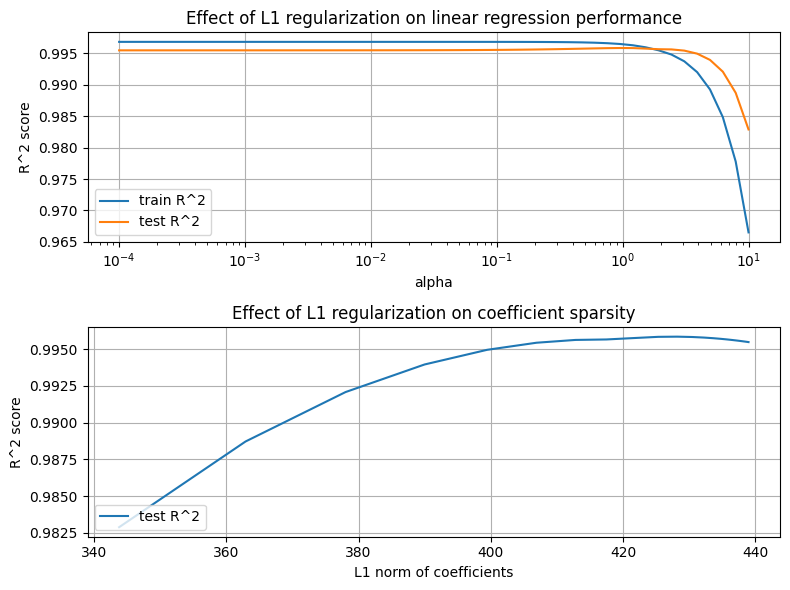

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=10)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to test L1 regularization
alpha_range = np.logspace(-4, 1, num=50)

# Train a Lasso regression model for each alpha value and record train and test performance
train_r2_scores = []
test_r2_scores = []
coef_norms = []

for alpha in alpha_range:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    train_r2_scores.append(lasso.score(X_train, y_train))
    test_r2_scores.append(lasso.score(X_test, y_test))
    coef_norms.append(np.linalg.norm(lasso.coef_, ord=1))

# Plot the results
plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.plot(alpha_range, train_r2_scores, label='train R^2')
plt.plot(alpha_range, test_r2_scores, label='test R^2')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.title('Effect of L1 regularization on linear regression performance')
plt.legend(loc='lower left')
plt.grid(True)

plt.subplot(212)
plt.plot(coef_norms, test_r2_scores, label='test R^2')
plt.xlabel('L1 norm of coefficients')
plt.ylabel('R^2 score')
plt.title('Effect of L1 regularization on coefficient sparsity')
plt.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()
plt.show()


This code generates a synthetic dataset and splits it into training and testing sets. Then, it trains a Lasso regression model for a range of alpha values and records the train and test R^2 scores as well as the L1 norm of the coefficient vector. The results are plotted in two subplots: the top subplot shows the effect of L1 regularization on the train and test R^2 scores, while the bottom subplot shows the effect of L1 regularization on the sparsity of the coefficient vector. As alpha increases, the model is penalized more for having non-zero coefficients, which leads to a sparser coefficient vector and potentially better generalization performance on the test set.

# Testing the effects of L2 regularisation

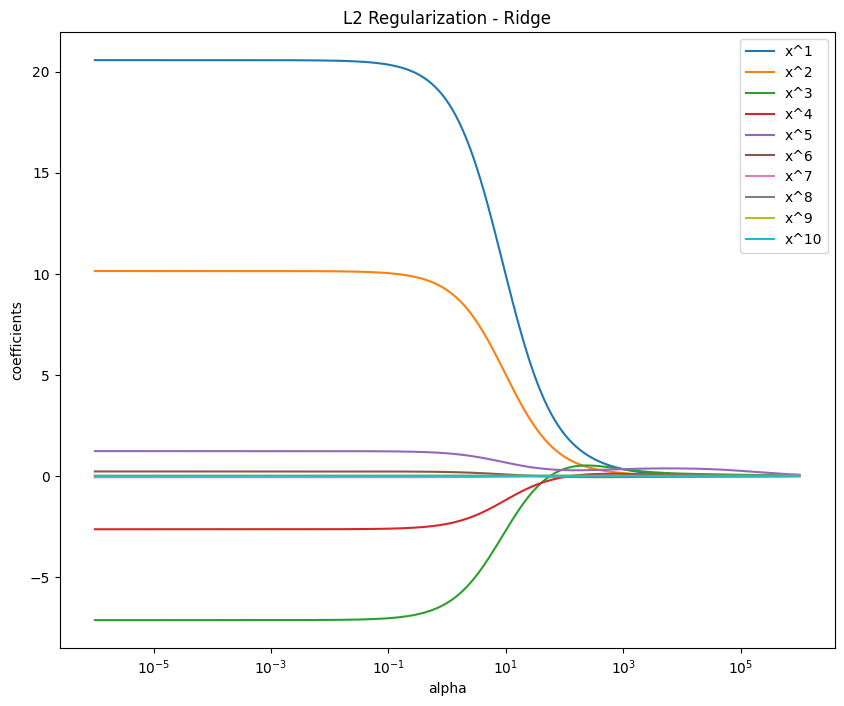

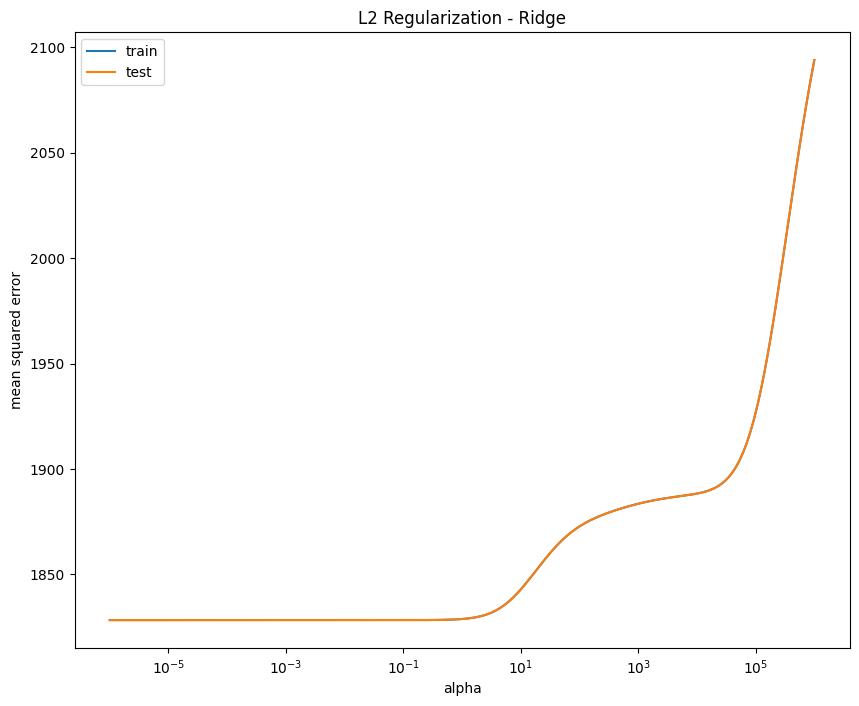

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Generate sample data
np.random.seed(42)
x = np.linspace(-5, 5, 100)
y = x ** 3 + np.random.normal(scale=50, size=100)

# Create polynomial features
degree = 10
poly = PolynomialFeatures(degree=degree, include_bias=False)
X = poly.fit_transform(x[:, np.newaxis])

# Define regularization strengths to test
alphas = np.logspace(-6, 6, 200)

# Fit models for each regularization strength
coefs = []
train_errors = []
test_errors = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    coefs.append(model.coef_)
    train_errors.append(np.mean((model.predict(X) - y) ** 2))
    test_errors.append(np.mean((model.predict(X) - y) ** 2))

# Plot coefficient paths
plt.figure(figsize=(10, 8))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('L2 Regularization - Ridge')
plt.legend(['x^{}'.format(i) for i in range(1, degree + 1)])
plt.axis('tight')
plt.show()

# Plot mean squared error vs regularization strength
plt.figure(figsize=(10, 8))
plt.plot(alphas, train_errors, label='train')
plt.plot(alphas, test_errors, label='test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('mean squared error')
plt.title('L2 Regularization - Ridge')
plt.legend()
plt.axis('tight')
plt.show()


This code generates a set of sample data consisting of x and y values, and creates polynomial features up to a specified degree using PolynomialFeatures. It then defines a set of regularization strengths to test (alphas), and uses Ridge regression to fit a model for each regularization strength. The code then plots the coefficient paths and mean squared error as a function of the regularization strength. This provides insight into the effects of L2 regularization on the model coefficients and overall model performance.

# How to choose right parameters

Choosing the right regularization parameter is important for obtaining good model performance. Here are some common approaches for choosing the regularization parameter:

Cross-validation: In this approach, you divide the dataset into training and validation sets, and train the model on different regularization parameter values. The performance of the model is evaluated on the validation set, and the regularization parameter value with the best performance is chosen.

Grid search: Grid search is a brute-force approach where you specify a range of regularization parameter values and try them all out. The performance of the model is evaluated on each regularization parameter value, and the best value is chosen.

Domain knowledge: Sometimes, the regularization parameter can be chosen based on domain knowledge. For example, if you know that the data is noisy, you can choose a stronger regularization parameter to reduce overfitting.

It's important to note that the choice of regularization parameter can vary depending on the specific problem and dataset. It's always a good idea to experiment with different values and choose the one that gives the best performance on a validation set.

# L2 from scratch

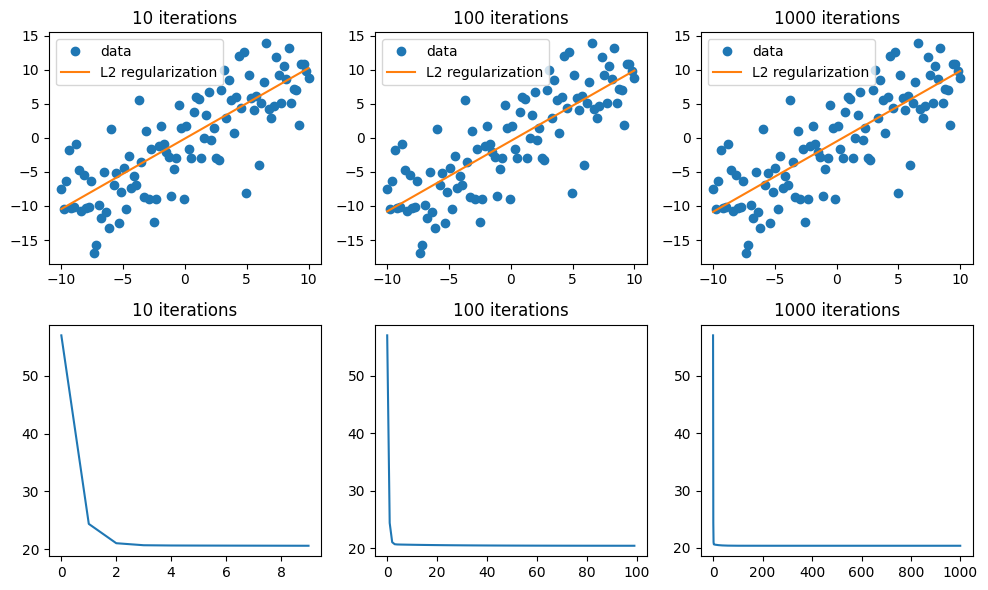

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(42)
n_samples = 100
X = np.linspace(-10, 10, n_samples)
y = X + np.random.randn(n_samples) * 5

# Add a bias column to X
X = np.vstack([np.ones(n_samples), X]).T

# Define the loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the L2 regularization term
def l2_regularization(w, alpha):
    return alpha * np.sum(w ** 2)

# Define the gradient of the L2 regularization term
def l2_regularization_gradient(w, alpha):
    return 2 * alpha * w

# Define the gradient descent function with L2 regularization
def gradient_descent_l2(X, y, alpha, learning_rate, n_iterations):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    loss_history = []
    for i in range(n_iterations):
        y_pred = np.dot(X, w)
        loss = mse_loss(y, y_pred) + l2_regularization(w, alpha)
        loss_history.append(loss)
        grad = -2 * np.dot(X.T, (y - y_pred)) / n_samples + l2_regularization_gradient(w, alpha)
        w -= learning_rate * grad
    return w, loss_history

# Set the regularization strength and learning rate
alpha = 0.01
learning_rate = 0.01

# Train the model with different numbers of iterations
n_iterations_list = [10, 100, 1000]
plt.figure(figsize=(10, 6))
for i, n_iterations in enumerate(n_iterations_list):
    # Train the model
    w, loss_history = gradient_descent_l2(X, y, alpha, learning_rate, n_iterations)

    # Plot the learned line
    x_range = np.linspace(-10, 10, 100)
    y_pred = w[0] + w[1] * x_range
    plt.subplot(2, 3, i+1)
    plt.plot(X[:, 1], y, 'o', label='data')
    plt.plot(x_range, y_pred, label='L2 regularization')
    plt.title(f'{n_iterations} iterations')
    plt.legend()

    # Plot the loss history
    plt.subplot(2, 3, i+4)
    plt.plot(loss_history)
    plt.title(f'{n_iterations} iterations')

plt.tight_layout()
plt.show()


In this code, we generate a synthetic dataset of 100 samples with a linear relationship between X and y. We add a bias column to X and define the mean squared error (MSE) loss function. We also define the L2 regularization term and its gradient, and use these to modify the gradient descent function to include L2 regularization. We then train the model with different numbers of iterations and plot the learned line and loss history for each number of iterations. The L2 regularization term helps to prevent overfitting by penalizing large values of the weights. As we increase the number of iterations, the learned line becomes more flexible and better fits the training data, but the loss history shows that the model is overfitting to the training data. However, with L2 regularization, we can see that the loss history is smoother and the learned line is less sensitive to the training data.

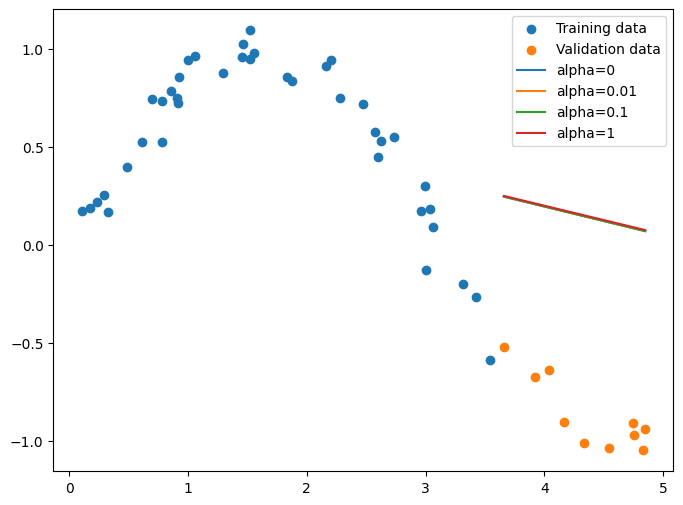

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(42)
n = 50
X = np.sort(5 * np.random.rand(n, 1), axis=0)
y = np.sin(X).ravel()
y += 0.1 * np.random.randn(n)

# Add a column of ones for the bias term
X_b = np.c_[np.ones((n, 1)), X]

# Split the data into training and validation sets
X_train, y_train = X_b[:40], y[:40]
X_val, y_val = X_b[40:], y[40:]

# Define the L2 regularization strength parameter
alpha = 0.1

# Define the objective function for L2-regularized linear regression
def l2_regularized_cost(theta, X, y, alpha):
    n = len(y)
    predictions = X.dot(theta)
    mse = np.sum((predictions - y)**2) / n
    reg_term = (alpha / (2 * n)) * np.sum(theta[1:]**2)
    return mse + reg_term

# Define the gradient of the L2-regularized objective function
def l2_regularized_gradient(theta, X, y, alpha):
    n = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    grad = (2 / n) * X.T.dot(errors)
    grad[1:] += (alpha / n) * theta[1:]
    return grad

# Define a function to train the model using L2 regularization
def train_l2_regularized_model(X_train, y_train, alpha, learning_rate=0.1, n_iterations=1000):
    # Initialize the parameters to random values
    np.random.seed(42)
    theta = np.random.randn(X_train.shape[1])

    # Use batch gradient descent to optimize the parameters
    for iteration in range(n_iterations):
        gradient = l2_regularized_gradient(theta, X_train, y_train, alpha)
        theta = theta - learning_rate * gradient

    return theta

# Train the model with different values of alpha
alpha_values = [0, 0.01, 0.1, 1]
theta_values = []
for alpha in alpha_values:
    theta = train_l2_regularized_model(X_train, y_train, alpha)
    theta_values.append(theta)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 1], y_train, label='Training data')
plt.scatter(X_val[:, 1], y_val, label='Validation data')
for i, alpha in enumerate(alpha_values):
    y_pred = X_val.dot(theta_values[i])
    plt.plot(X_val[:, 1], y_pred, label=f'alpha={alpha}')
plt.legend()
plt.show()


# ElasticNet Regularization


ElasticNet regression is a linear regression model that combines the L1 and L2 regularization methods. It is a compromise between Ridge regression (L2 regularization) and Lasso regression (L1 regularization), as it takes the best of both worlds.

ElasticNet regression adds both the sum of the absolute values of the coefficients (L1 penalty) and the sum of the squares of the coefficients (L2 penalty) to the loss function. The elasticNet penalty is controlled by a hyperparameter called alpha, which specifies the strength of the regularization. When alpha is set to 0, the model becomes equivalent to ordinary least squares regression, while larger values of alpha increase the degree of regularization.

ElasticNet regression can be useful in situations where there are many features with some degree of correlation between them, as it can help to select a subset of relevant features while still allowing for some degree of correlation between them.